<a href="https://colab.research.google.com/github/KlippL/Doctors_Reviews_NLP/blob/master/Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Makes a Good Doctor ?

## Text Analysis of Doctor Reviews Using Fisher's Discriminant, LDA and Word Embedding

Patients are increasingly turning to patient review sites when looking for new doctors. While patient reviews might not reflect the full range of experiences that a doctor provides, it is important for doctors to know what experiences patients cite when giving either good or bad reviews. 



---


Contributors: Sonal Agrawal, Jingyao Kang, Laura Klipp, Rahul Panicker

#### Background and Data Collection

Patient reviews were scraped from the two most frequently studied patient review websites, Ratemds.com and Healthgrades.com. Data was scraped for multiple specialties in various cities around the United States. 


```

```

Reviews were scraped for the following 6 specialties:
1. Family Doctors / General Practitioners
2. Internal Medicine
3. General Surgery
4. Cardiology
5. OBGYN
6. Pediatrics

Reviews were scraped in the following 5 cities:
1. Los Angeles
2. Houston
3. Atlanta
4. Detroit
5. Seattle

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np   
import nltk 
import string
import os
import gensim
from gensim import corpora
!pip install pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")                                   #Ignoring unnecessory warnings

import matplotlib.pyplot as pyplot
from wordcloud import WordCloud
from nltk.corpus import stopwords                                   #Stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer                                 # Stemmer
from nltk.stem import WordNetLemmatizer                            # Lemmatizer
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data Sets

* Import all scrapes from each specialty and combine them 
* Only keep the star rating from the review and the review
* Subset the data only for the good reviews (4 stars and above) and the bad reviews (3 stars and below)
* Make a dummy column of the good and bad reviews
* Make two new df of good and bad reviews

In [0]:
# Cardiologists
dfCard1 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Hou.csv", index_col ='Unnamed: 0')
dfCard2 = pd.read_csv("https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_LA.csv", index_col ='Unnamed: 0')
dfCard3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Atl.csv', index_col ='Unnamed: 0')
dfCard4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Sea.csv', index_col ='Unnamed: 0')
dfCard5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Cardiologist_Det.csv', index_col ='Unnamed: 0')
dfCard6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Cardiologist_Hou.csv', sep = '\t', index_col ='Unnamed: 0')

# Family General Practitioners
dfGP1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Atl.csv', index_col ='Unnamed: 0')
dfGP2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Hou.csv', index_col ='Unnamed: 0')
dfGP3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_LA.csv', index_col ='Unnamed: 0')
dfGP4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Sea.csv', index_col ='Unnamed: 0')
dfGP5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Family_GP_Det.csv', index_col ='Unnamed: 0')
dfGP6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Family_GP_Hou.csv', sep = '\t', index_col ='Unnamed: 0')

# Internal Medicine
dfInt1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Atl.csv', index_col ='Unnamed: 0')
dfInt2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Hou.csv', index_col ='Unnamed: 0')
dfInt3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_LA.csv', index_col ='Unnamed: 0')
dfInt4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Sea.csv', index_col ='Unnamed: 0')
dfInt5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Intern_Det.csv', index_col ='Unnamed: 0')
dfInt6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Intern_Hou.csv', sep = '\t', index_col ='Unnamed: 0')

# Pediatrics
dfPed1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Atl.csv', index_col ='Unnamed: 0')
dfPed2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Hou.csv', index_col ='Unnamed: 0')
dfPed3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_LA.csv', index_col ='Unnamed: 0')
dfPed4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Sea.csv', index_col ='Unnamed: 0')
dfPed5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Ped_Det.csv', index_col ='Unnamed: 0')
dfPed6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Ped_Hou.csv', sep = '\t', index_col ='Unnamed: 0')

# General Surgery
dfSurg1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Atl.csv', index_col ='Unnamed: 0')
dfSurg2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Hou.csv', index_col ='Unnamed: 0')
dfSurg3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_LA.csv', index_col ='Unnamed: 0')
dfSurg4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Sea.csv', index_col ='Unnamed: 0')
dfSurg5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_Surgery_Det.csv', index_col ='Unnamed: 0')
dfSurg6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_Surgery_Hou.csv', sep = '\t', index_col ='Unnamed: 0')

# OBGYN
dfOB1 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Atl.csv', index_col ='Unnamed: 0')
dfOB2 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Hou.csv', index_col ='Unnamed: 0')
dfOB3 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_LA.csv', index_col ='Unnamed: 0')
dfOB4 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Sea.csv', index_col ='Unnamed: 0')
dfOB5 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/RateMD_OBGYN_Det.csv', index_col ='Unnamed: 0')
dfOB6 = pd.read_csv('https://raw.githubusercontent.com/KlippL/Doctors_Reviews_NLP/master/Doctor_reviews/Healthgrades_OBGYN_Hou.csv', sep = '\t', index_col ='Unnamed: 0')

In [69]:
df_cardio = pd.concat([dfCard1, dfCard2, dfCard3, dfCard4, dfCard5, dfCard6],ignore_index=True, sort=True)
df_gp = pd.concat([dfGP1, dfGP2, dfGP3, dfGP4, dfGP5, dfGP6],ignore_index=True, sort=True)
df_intern = pd.concat([dfInt1, dfInt2, dfInt3, dfInt4, dfInt5, dfInt6],ignore_index=True, sort=True)
df_ped = pd.concat([dfPed1, dfPed2, dfPed3, dfPed4, dfPed5, dfPed6],ignore_index=True, sort=True)
df_surg = pd.concat([dfSurg1, dfSurg2, dfSurg3, dfSurg4, dfSurg5, dfSurg6],ignore_index=True, sort=True)
df_ob = pd.concat([dfOB1, dfOB2, dfOB3, dfOB4, dfOB5, dfOB6],ignore_index=True, sort=True)

df_a = pd.concat([df_cardio, df_gp, df_intern, df_ped, df_surg, df_ob], ignore_index=True, sort=True)

df_a = df_a[df_a.review.notnull()]
df_a = df_a[df_a.review != "None"]

print (len(df_a))

df_a.head()

17635


,city,doctor_name,gender,helpfullness_rating,helpfulness_rating,individual_rating,knowledge_rating,overall_rating,review,review_count,review_date,scheduling_rating,specialty,staff_rating,state,wait_time,wait_time_rating
0,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,I was assigned Dr Attar in the Methodist ER. H...,21,2017-12-15T00:55:45.983Z,NaN,cardiologist,5,Texas,NaN,5.0
1,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,His kindness and caring gave me the sense that...,21,2016-08-30T05:07:29.955Z,NaN,Cardiologist,5,Texas,NaN,5.0
2,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,He was my cardiologist when I used to live in ...,21,2016-06-19T09:41:34.719Z,NaN,Cardiologist,5,Texas,NaN,5.0
3,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,"Dr.Attar is the best Dr anywhere, i love him t...",21,2016-03-30T02:20:23.272Z,NaN,Cardiologist,5,Texas,NaN,5.0
4,Angleton,Dr. Mohammed Attar,Male,5.0,NaN,5,5,4.93,The doctor who was sent to us from god. He is ...,21,2014-09-10T00:46:59.381Z,NaN,Cardiologist,5,Texas,NaN,5.0


#### The distribution of star ratings for reviews shows that most people write doctors reviews when they have something positive to say. While negative reviews are less frequent than positive reviews, we can still an increase on either end of the extremes. We therefore take out the reviews between 3 and 4 stars so that we can look at words that are in the grouping of good reviews or bad reviews. 

<Figure size 1800x720 with 0 Axes>

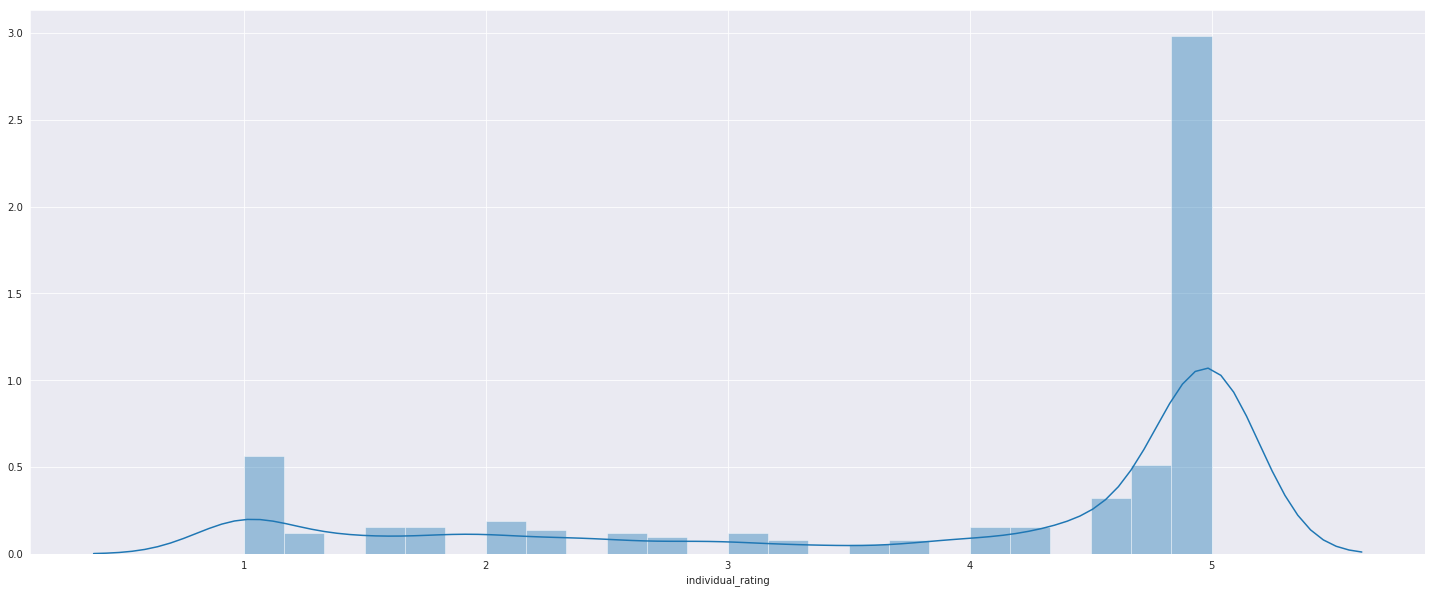

In [4]:
df_a.individual_rating = df_a.individual_rating.astype(float)
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.distplot(df_a.individual_rating, norm_hist=False)

In [70]:
# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_all = df_a[['individual_rating', 'review']]
df_all.individual_rating = df_all.individual_rating.astype(float)
df_all = df_all[(df_all.individual_rating >= 4) | (df_all.individual_rating < 3)]

# Make a separate df of good reviews and bad reviews
df_good = df_all[(df_all.individual_rating >= 4)]
df_bad = df_all[(df_all.individual_rating < 3)]

# Make a dummy column in df_all for if a review is good or bad
df_all['is_good'] = (df_all.individual_rating >= 4) * 1 + (df_all.individual_rating < 3) * 0

print("Number of good reviews: ")  
(df_all['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(df_all['is_good'] == 0).sum()

Number of good reviews: 


12135

 
 Number of bad reviews:


4526

#### The distribution of word count across patient reviews

<Figure size 1800x720 with 0 Axes>

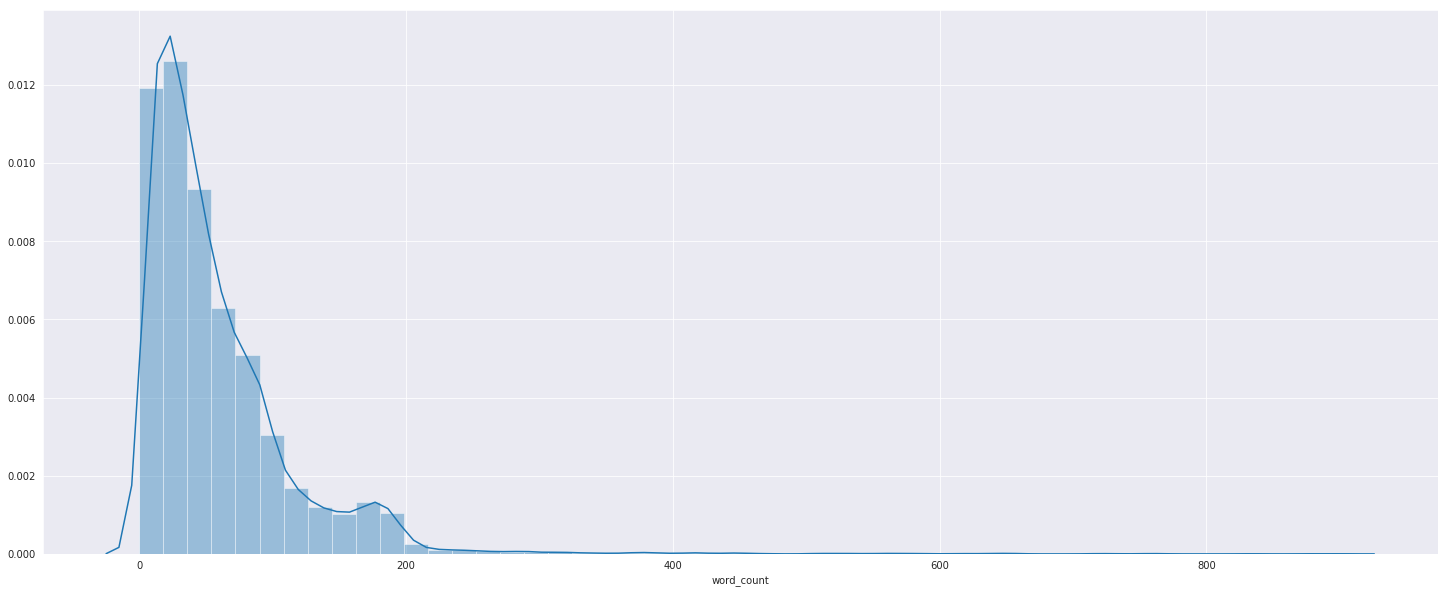

In [6]:
df_all['word_count'] = df_all['review'].apply(lambda x: len(str(x).split()))
df_all_words = df_all[df_all.word_count < 500]

sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.distplot(df_all.word_count)

In [71]:
random_sub = df_all.sample(n=12500, random_state = 2)
random_sub.head()

print("Number of good reviews: ")  
(random_sub['is_good'] == 1).sum()
print(' ')
print(" Number of bad reviews:") 
(random_sub['is_good'] == 0).sum()

,individual_rating,review,is_good
14529,5.0,"LOVE, LOVE, LOVE Dr Sharon!! BEST DOCTOR EVER!...",1
5864,1.0,due to rain/traffic I was exactly 12 mins late...,0
18041,4.8,Best Doc in the world! I've known Dr. Zipkin f...,1
4825,4.5,I LOVE Dr McCaleb! She is THE Best and no one ...,1
18520,5.0,She is a fantastic Dr..helpful..caring and ver...,1


Number of good reviews: 


9137

 
 Number of bad reviews:


3363

### Define Cleaning Functions

In [0]:
# Remove Punctuation
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c,"")
    return s

def removePunc(text_array):
    nopunc = []
    for h in text_array:
        try:
            nopunc.append(removePuncStr(h))
        except:
            nopunc.append(h)
    return nopunc

# Remove Numbers
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    nonum = []
    for n in text_array:
        try:
            nonum.append(removeNumbersStr(n))
        except:
            nonum.append(i)
    return nonum

# Remove Stopwords
def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text


# Lemmentization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def lemmText(text_array):
    WNlemmatizer = WordNetLemmatizer()
    lemmatized_text = []
    for h in text_array:
        try:
            words = word_tokenize(h) 
            h2 = ''
            for w in words:
                h2 = h2 + ' ' + WNlemmatizer.lemmatize(w,pos="v")
            lemmatized_text.append(h2)
        except:
            lemmatized_text.append(h)
    return lemmatized_text

# Removing other words that don't impact reviews
def stopOther(text_array):
    stop_words = set(['as','dr', 'doctor', 'doctors', 'he_is', 'said', 'told', 'did_not', 'another', 'didnt', \
                      'and_then', 'to_be','would', 'get', 'go', 'even', 'takes', 'at_all', 'doesnt', 'is_not', \
                      'about_it', 'about', 'across', 'act', 'acts', 'two', 'back', 'dont', 'patient', 'office', \
                      'of_the', 'in_the', 'one', 'also', 'have_been', 'always', 'he_has', 'like', 'see', 'and_his', \
                      'of_my', 'one_of', 'is_the', 'going', 'first', 'is_very', 'anyone', 'could', 'really', 'him_to'\
                      'to_the', 'and_he', 'has_been', 'in_his', 'to_see', 'went', 'for_the', 'in_my', 'she_is', \
                      'if_you', 'way', 'many', 'hes', 'since', 'to_me', 'and_the', 'that_he', 'is_an', 'me_and', \
                      'ive', 'say', 'man', 'him_and', 'with_my', 'to_him', 'of_his', 'and_was', 'on_the', 'with_the', \
                      'with_me', 'with_his', 'second', 'much', 'of_dr', 'im', 'to_have', 'and_my', 'at_the', 'as_well', \
                      'done', 'for_my', 'to_my', 'was_very', 'the_doctor', 'me_to', 'and_very', 'it_is', 'and_have', \
                      'ago', 'to_get', 'houston', 'sure', 'you_are', 'the_most', 'for_his', 'to_dr', 'and_has', \
                      'would_not', 'saw', 'doctor_he', 'it_was', 'had_to', 'is_one', 'going_to', 'for_over', 'that_was', \
                      'thorough_and', 'us', 'able_to', 'out_of', 'he_says', 'will', 'he_was', 'ever', 'him_to', \
                      'to_the', 'make', 'took', 'made', 'he_is_very', 'care_of', 'with_dr', 'things', 'go_to', 'came', \
                      'without', 'see_him', 'been_my', 'every', 'about_his', 'is_one_of', 'to_his', 'put', 'to_make', \
                      'for_me', 'have_to', 'may', 'all_of', 'and_is', 'with_him', 'would_have', 'to_take', 'to_you', \
                      'he_is_the', 'does_not', 'with_you', 'he_did', 'him_for', 'all_the', 'have_had', 'his_time', \
                      'you_have', 'want', 'what_is', 'seems', 'doctor_is', 'and_they', 'lot', 'to_go', 'went_to', \
                      'not_be', 'from_the', 'was_in', 'to_do', 'three', 'but_he', 'one_of_the', 'several', 'for_him', \
                      'and_takes', 'takes_the', 'is_one_of_the', 'he_will', 'actually', 'not_only', 'she_was', \
                      'he_takes', 'md', 'he_is_more', 'who_is', 'was_not', 'he_should', 'he_sent', 'he_was_more', \
                      'health_the', 'heard_of', 'he_was_so', 'he_was_our', 'he_was_on', 'he_put_in', 'he_is_now', \
                      'he_is_part', 'he_is_really', 'he_is_just', 'he_is_in', 'he_only', 'he_not_only', 'he_needed_to', \
                      'he_may', 'he_just', 'he_knew_the', 'he_worked', 'he_works', 'he_wrote', 'head_now', \
                      'he_is_one_the', 'he_is_now_my', 'he_is_in_this', 'he_is_able_to', 'he_is_able_to_do', \
                      'he_is_able', 'he_is_doing_and', 'he_needed', 'he_only_has', 'year', 'years', 'got', 'to_this',\
                      'do_not', 'and_had', 'me_that', 'this_is', 'at_me', 'of_this', 'the_is', 'to_come', 'wont', \
                      'this_was', 'she_had', 'to_to', 'that_had', 'then_she', 'in_for', 'me_for', 'is_of', 'for_an', \
                      'and_when', 'with_this', 'she_is_very', 'because_of', 'am_not', 'and_did_not', 'she_and_her', \
                      'this_and', 'him_again_and', 'her_very', 'take_those', 'on_all', 'them_not', 'at_the_same',\
                      'you_from', 'you_out_of', 'and_sometimes', 'when_he_was', 'that_in', 'but_we', 'with_our', \
                      'each_other', 'for_in', 'and_he_is_the', 'he_give', 'and_over', 'only_is', 'when_there', \
                      'have_in', 'have_he', 'that_have_been', 'has_an', 'there_he', 'but_what', 'who_have', 'yr', \
                      'there_is', 'out_of_his', 'him_when', 'in_addition', 'and_he_was', 'before_he', 'no_matter', \
                      'her_with', 'be_my', 'he_is_doing', 'tx', 'for_yrs', 'can_be', 'any_other', 'with_your', \
                      'rest_of', 'know_he', 'that_know', 'with_any', 'few_and',  'me_and_was', 'did_my', 'but_she_is', \
                      'think_the', 'and_know', 'they_take', 'yrs_and', 'for_their', 'for_being', 'with_her', 'she_has', \
                      'medical', 'never', 'pysician', 'now', 'day', 'seen', 'cardiologist', 'need', 'tell', 'work', \
                      'patients', 'to_how', 'lots', 'what_should', 'and_not', 'you_to', 'on_my', 'was_the', 'she_did',\
                      'that_the', 'had_no', 'to_her', 'and_she', 'shes', 'her_to', 'and_her', 'that_she', 'they_are', 'her_she', \
                      'not_to', 'and_that', 'for_and', 'in_her', 'more_than', 'her_for', "\'", "'", 'hare', 'nd', '`', "‘", "´"
                     ])
    stopped_text = []
    for h in text_array:
        try:
            words = word_tokenize(h)
            h2 = ''
            for w in words:
                if w not in stop_words:
                    h2 = h2 + ' ' + w
            stopped_text.append(h2)
        except:
            stopped_text.append(h)
    return stopped_text
  
  
#Tokenize each document
def textTokenize(text_array):
   textTokens = []
   for h in text_array:
       textTokens.append(h.split(' '))
   return textTokens

### Find differences in words that are used in good and bad reviews

Generating word clouds for total reviews, good reviews, and bad reviews shows differences in word frequencies between good and bad reviews. We can see that certain words appear in both the good and bad reviews such as *time* and *staff*. These are general words that we will later explore why these words are importand in both categories of reviews. 

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

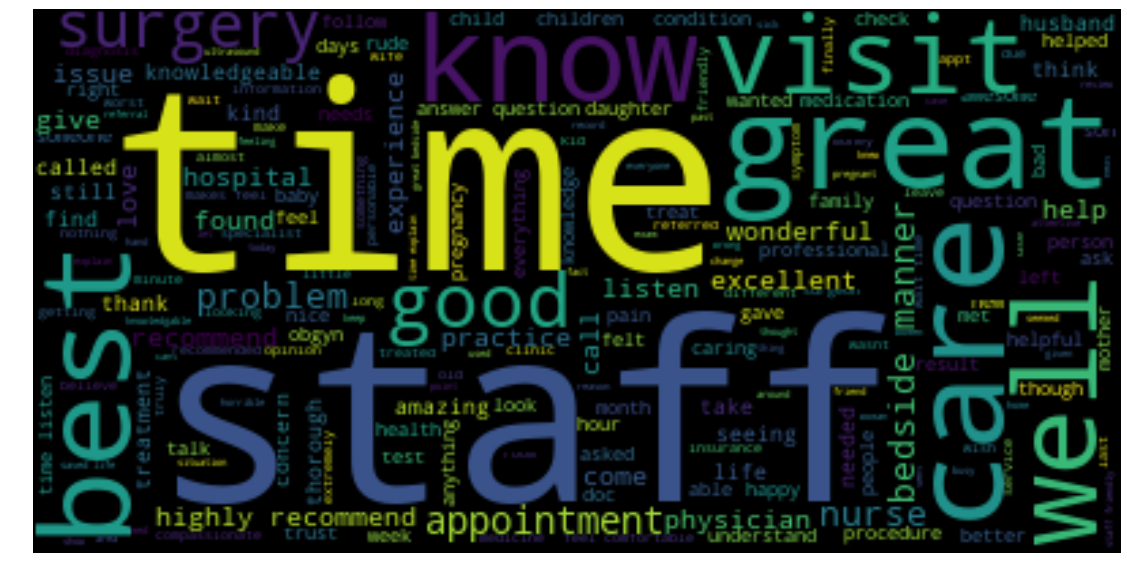

In [72]:
# Clean all reviews 
reviews_all = df_all.review.str.lower()
reviews_all = removePunc(reviews_all)
reviews_all = removeNumbers(reviews_all)
reviews_all = stopText(reviews_all)
reviews_all = stopOther(reviews_all)

# Word Cloud for all reviews
wordcloud = WordCloud().generate(pd.Series(reviews_all).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

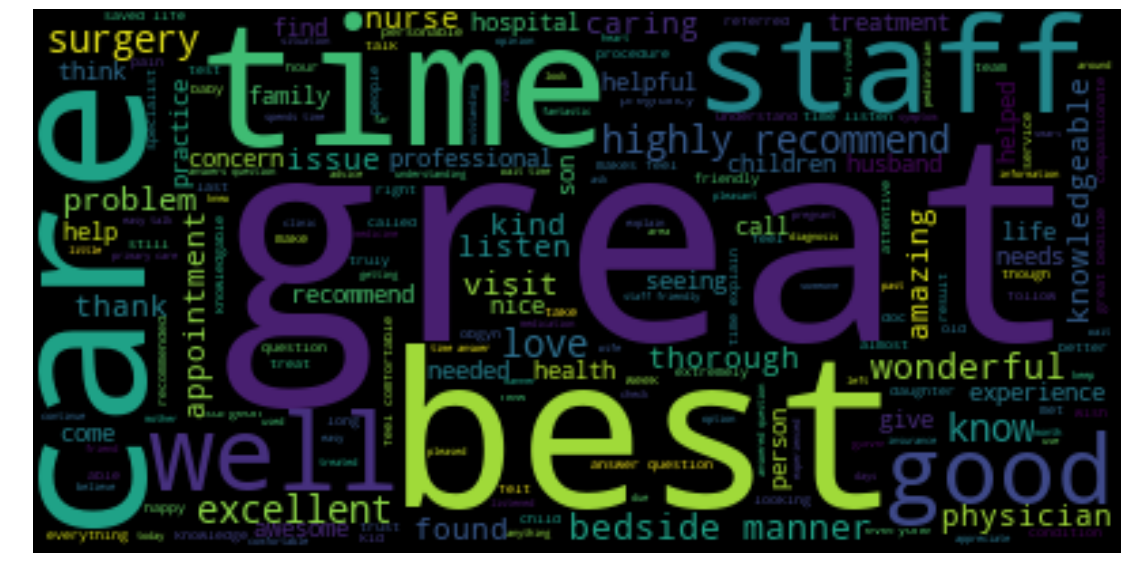

In [10]:
# Clean good reviews
reviews_good = df_good.review.str.lower()
reviews_good = removePunc(reviews_good)
reviews_good = removeNumbers(reviews_good)
reviews_good = stopText(reviews_good)
reviews_good = stopOther(reviews_good)
wordcloud = WordCloud().generate(pd.Series(reviews_good).str.cat(sep = " "))

# Word Cloud for good reviews
pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<Figure size 1440x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

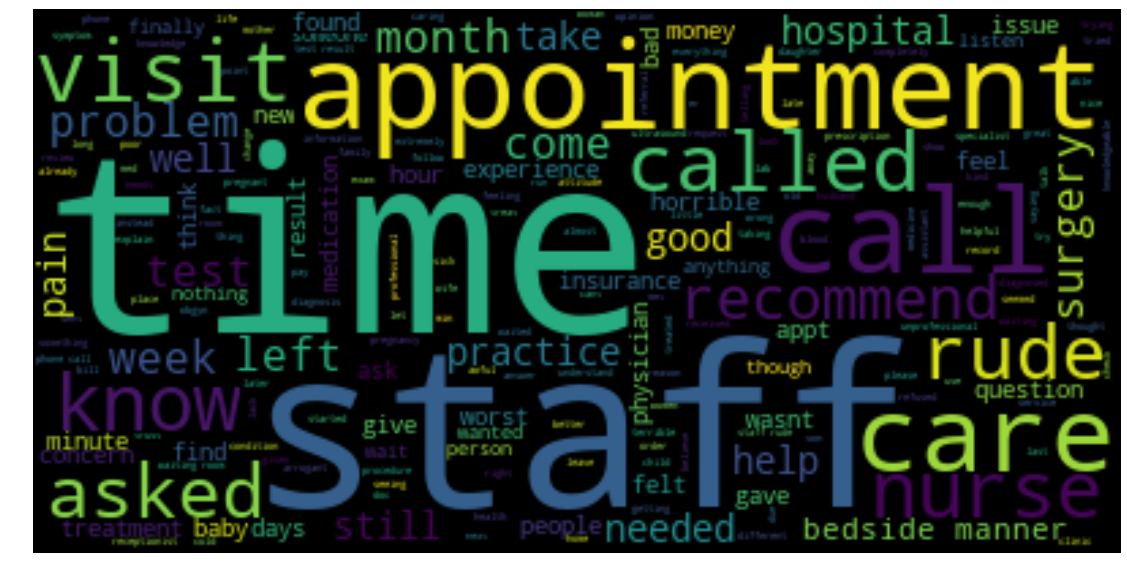

In [11]:
# Clean bad reviews
reviews_bad = df_bad.review.str.lower()
reviews_bad = removePunc(reviews_bad)
reviews_bad = removeNumbers(reviews_bad)
reviews_bad = stopText(reviews_bad)
reviews_bad = stopOther(reviews_bad)

# Word Cloud for bad reviews
wordcloud = WordCloud().generate(pd.Series(reviews_bad).str.cat(sep = " "))

pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

## Text Analysis

1. Find the top 20 words that appear in all reviews
2. Find the top 20 phrases that appear in all reviews
3. Find the top 20 most descriminating words or phrases that determine good and bad reviews using Fisher's Discriminant Score

In [0]:
reviews_sub = random_sub.review.str.lower()
reviews_sub = removePunc(reviews_sub)
reviews_sub = removeNumbers(reviews_sub)
reviews_sub = stopOther(reviews_sub)

vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X = vec.fit_transform(reviews_sub)

In [74]:
dtm = pd.DataFrame(X.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm = dtm.T
print(tdm.shape)

(14794, 12500)


### Create DF of most Frequent Words

In [75]:
tdm['total'] = tdm.sum(axis =1)
freq = tdm.reset_index().rename(columns = {"level_0":"allwords"})

words2 = freq.allwords.tolist()
words2 = stopText(words2)
words2 = stopOther(words2)

words2 = pd.Series(words2).str.lstrip(" ").tolist()

freq = freq[freq.allwords.isin(words2)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq.head(20)

,allwords,total
12248,time,3868
10833,staff,3162
4419,great,2340
2332,care,2293
9715,recommend,2069
1912,best,2014
11452,the_best,1580
4375,good,1512
2418,caring,1466
9609,questions,1420


### Most frequent phrases

In [76]:
freq['under_count'] = freq.allwords.str.count('_')
freq[freq.under_count>=3][['allwords','total']].head(20)

,allwords,total
5114,he_is_the_best,157
11873,the_time_to_listen,126
12326,time_to_listen_to,122
4674,has_been_my_for,117
3338,easy_to_talk_to,109
6658,is_very_knowledgeable_and,94
10459,she_the_time_to,93
10349,she_is_the_best,85
5245,he_the_time_to,84
6518,is_of_the_best,82


### Calculate Fisher's Discriminant Score

In [32]:
len(dtm)

12500

In [33]:
mask = pd.DataFrame(random_sub.is_good)
good_df = dtm.iloc[np.any(mask.values,axis=1),]
bad_df = dtm.iloc[~np.any(mask.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

1.0

In [34]:
FiDi = pd.DataFrame(((good_df.mean() - bad_df.mean())**2)/(np.std(good_df)**2 + np.std(bad_df)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words = FiDi.term.tolist()
words = stopText(words)
words = stopOther(words)

words = pd.Series(words).str.lstrip(" ").tolist()

FiDi = FiDi[FiDi.term.isin(words)].sort_values(by = 'FiDi_score', ascending = False)
FiDi.head(20)

,term,FiDi_score
10010,rude,0.168703
1912,best,0.128213
11452,the_best,0.123097
4419,great,0.120263
2418,caring,0.094559
5579,highly,0.094136
3519,excellent,0.093493
14551,worst,0.087540
5587,highly_recommend,0.076407
14504,wonderful,0.076245


In [35]:
FiDi['under_count'] = FiDi.term.str.count('_')
FiDi[FiDi.under_count>=3][['term','FiDi_score']].head(15)

,term,FiDi_score
5114,he_is_the_best,0.015675
12326,time_to_listen_to,0.010708
11873,the_time_to_listen,0.010300
4674,has_been_my_for,0.010158
6658,is_very_knowledgeable_and,0.009413
10459,she_the_time_to,0.009302
3338,easy_to_talk_to,0.009280
12126,this_is_the_worst,0.009001
6592,is_the_best_have,0.008944
6518,is_of_the_best,0.008838


## Word Embedding for Good and Bad Reviews

We use word embedding on popular but general terms to find out related words that help define why patients were either pleased or displeased. 

### Good Reviews

In [193]:
sentences_g = textTokenize(reviews_good)
while("" in sentences_g) : 
   sentences_g.remove("")

#Train the model on Word2Vec
model_g = gensim.models.Word2Vec(sentences_g, min_count=1)

df_words_good = pd.DataFrame()
word_list_good = ('time', 'call', 'staff', 'great', 'visit', 'well', 'good', 'care')
for i in word_list_good: 
  output = model_g.wv.most_similar(i,topn=7)
  dic = {i: output}
  df = pd.DataFrame.from_dict(dic).T
  df_words_good = pd.concat([df, df_words_good], sort=True)
  
df_words_good = df_words_good.rename(columns = {0: "word_1", 1: "word_2", 2: "word_3", 3: "word_4", 4: "word_5", 5: "word_6", 6: "word_7"})

# Make an output dataframe without tuples
for col in df_words_good.columns:
  df_words_good[col] = df_words_good[col].apply(lambda x: x[0])
  
df_words_good

,word_1,word_2,word_3,word_4,word_5,word_6,word_7
care,welfare,treats,epitome,field,devoted,huang,respect
good,personality,funny,earth,impeccable,genuine,approachable,knowlegeable
well,direct,provides,generous,prompt,responsive,goes,welcoming
visit,welcome,relaxed,making,secure,confident,important,ease
great,humor,excellent,mushy,wonderful,personality,sense,good
staff,courteous,efficient,polite,professional,helpful,super,nice
call,results,hour,phone,right,meets,awkward,usually
time,talk,explain,ample,spent,listen,rush,understand


### Bad Reviews

In [192]:
sentences_b = textTokenize(reviews_bad)
while("" in sentences_b) : 
   sentences_b.remove("")

#Train the model on Word2Vec
model_b = gensim.models.Word2Vec(sentences_b, min_count=1)

df_words_bad = pd.DataFrame()
word_list_bad = ('time', 'highly', 'staff', 'appointment', 'worst', 'wonderful', 'asked', 'called', 'recommend', 'surgery')
for i in word_list_bad: 
  output = model_b.wv.most_similar(i,topn=7)
  dic = {i: output}
  df = pd.DataFrame.from_dict(dic).T
  df_words_bad = pd.concat([df, df_words_bad], sort=True)
    
df_words_bad = df_words_bad.rename(columns = {0: "word_1", 1: "word_2", 2: "word_3", 3: "word_4", 4: "word_5", 5: "word_6", 6: "word_7"})

# Make an output dataframe without tuples
for col in df_words_bad.columns:
  df_words_bad[col] = df_words_bad[col].apply(lambda x: x[0])
  
df_words_bad

,word_1,word_2,word_3,word_4,word_5,word_6,word_7
surgery,wanted,normal,home,found,letter,meds,refused
recommend,listen,arrogant,condescending,uncaring,lack,encountered,good
called,week,later,call,next,weeks,come,still
asked,month,months,showed,ask,still,prescription,discuss
wonderful,wish,used,however,woman,save,atlanta,surgeon
worst,horrible,terrible,poor,experience,,rude,awful
appointment,hours,lobby,time,packed,late,long,half
staff,extremely,unprofessional,inconsiderate,rudest,encountered,bad,rude
highly,surgeon,use,woman,group,wish,kind,save
time,long,late,lobby,exam,mins,packed,half


## Topic Analysis Using LDA

### Topic Analysis for Overall Reviews

In [0]:
# Topic Analysis for all reviews
rvws_all = stopText(reviews_all)
rvws_all = stopOther(rvws_all)
clean_rvws_all = [i.split() for i in rvws_all]

clean_rvws_all_new = []
for c in clean_rvws_all:
  clean_rvws_all_new.append([e for e in c if e not in ("’")])
   
# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_all = corpora.Dictionary(clean_rvws_all_new)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_all = [dictionary_all.doc2bow(doc) for doc in clean_rvws_all_new]

In [0]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_all = Lda(doc_term_matrix_all, num_topics=4, id2word = dictionary_all, passes=50)

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 0')

[Text(0, 0, 'time'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'appointment'),
 Text(0, 0, 'call'),
 Text(0, 0, 'rude'),
 Text(0, 0, 'called'),
 Text(0, 0, 'know'),
 Text(0, 0, 'room'),
 Text(0, 0, 'asked'),
 Text(0, 0, 'wait')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 1')

[Text(0, 0, 'time'),
 Text(0, 0, 'great'),
 Text(0, 0, 'staff'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'questions'),
 Text(0, 0, 'feel'),
 Text(0, 0, 'caring'),
 Text(0, 0, 'best'),
 Text(0, 0, 'knowledgeable'),
 Text(0, 0, 'good')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 2')

[Text(0, 0, 'surgery'),
 Text(0, 0, 'best'),
 Text(0, 0, 'care'),
 Text(0, 0, 'recommend'),
 Text(0, 0, 'life'),
 Text(0, 0, 'family'),
 Text(0, 0, 'excellent'),
 Text(0, 0, 'physician'),
 Text(0, 0, 'surgeon'),
 Text(0, 0, 'highly')]

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0, 0.5, 'Word Count')

(0, 0.03)

(0, 3500)

Text(0.5, 1.0, 'Topic: 3')

[Text(0, 0, 'health'),
 Text(0, 0, 'good'),
 Text(0, 0, 'medicine'),
 Text(0, 0, 'fibroids'),
 Text(0, 0, 'help'),
 Text(0, 0, 'issues'),
 Text(0, 0, 'treatment'),
 Text(0, 0, 'care'),
 Text(0, 0, 'life'),
 Text(0, 0, 'illness')]

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

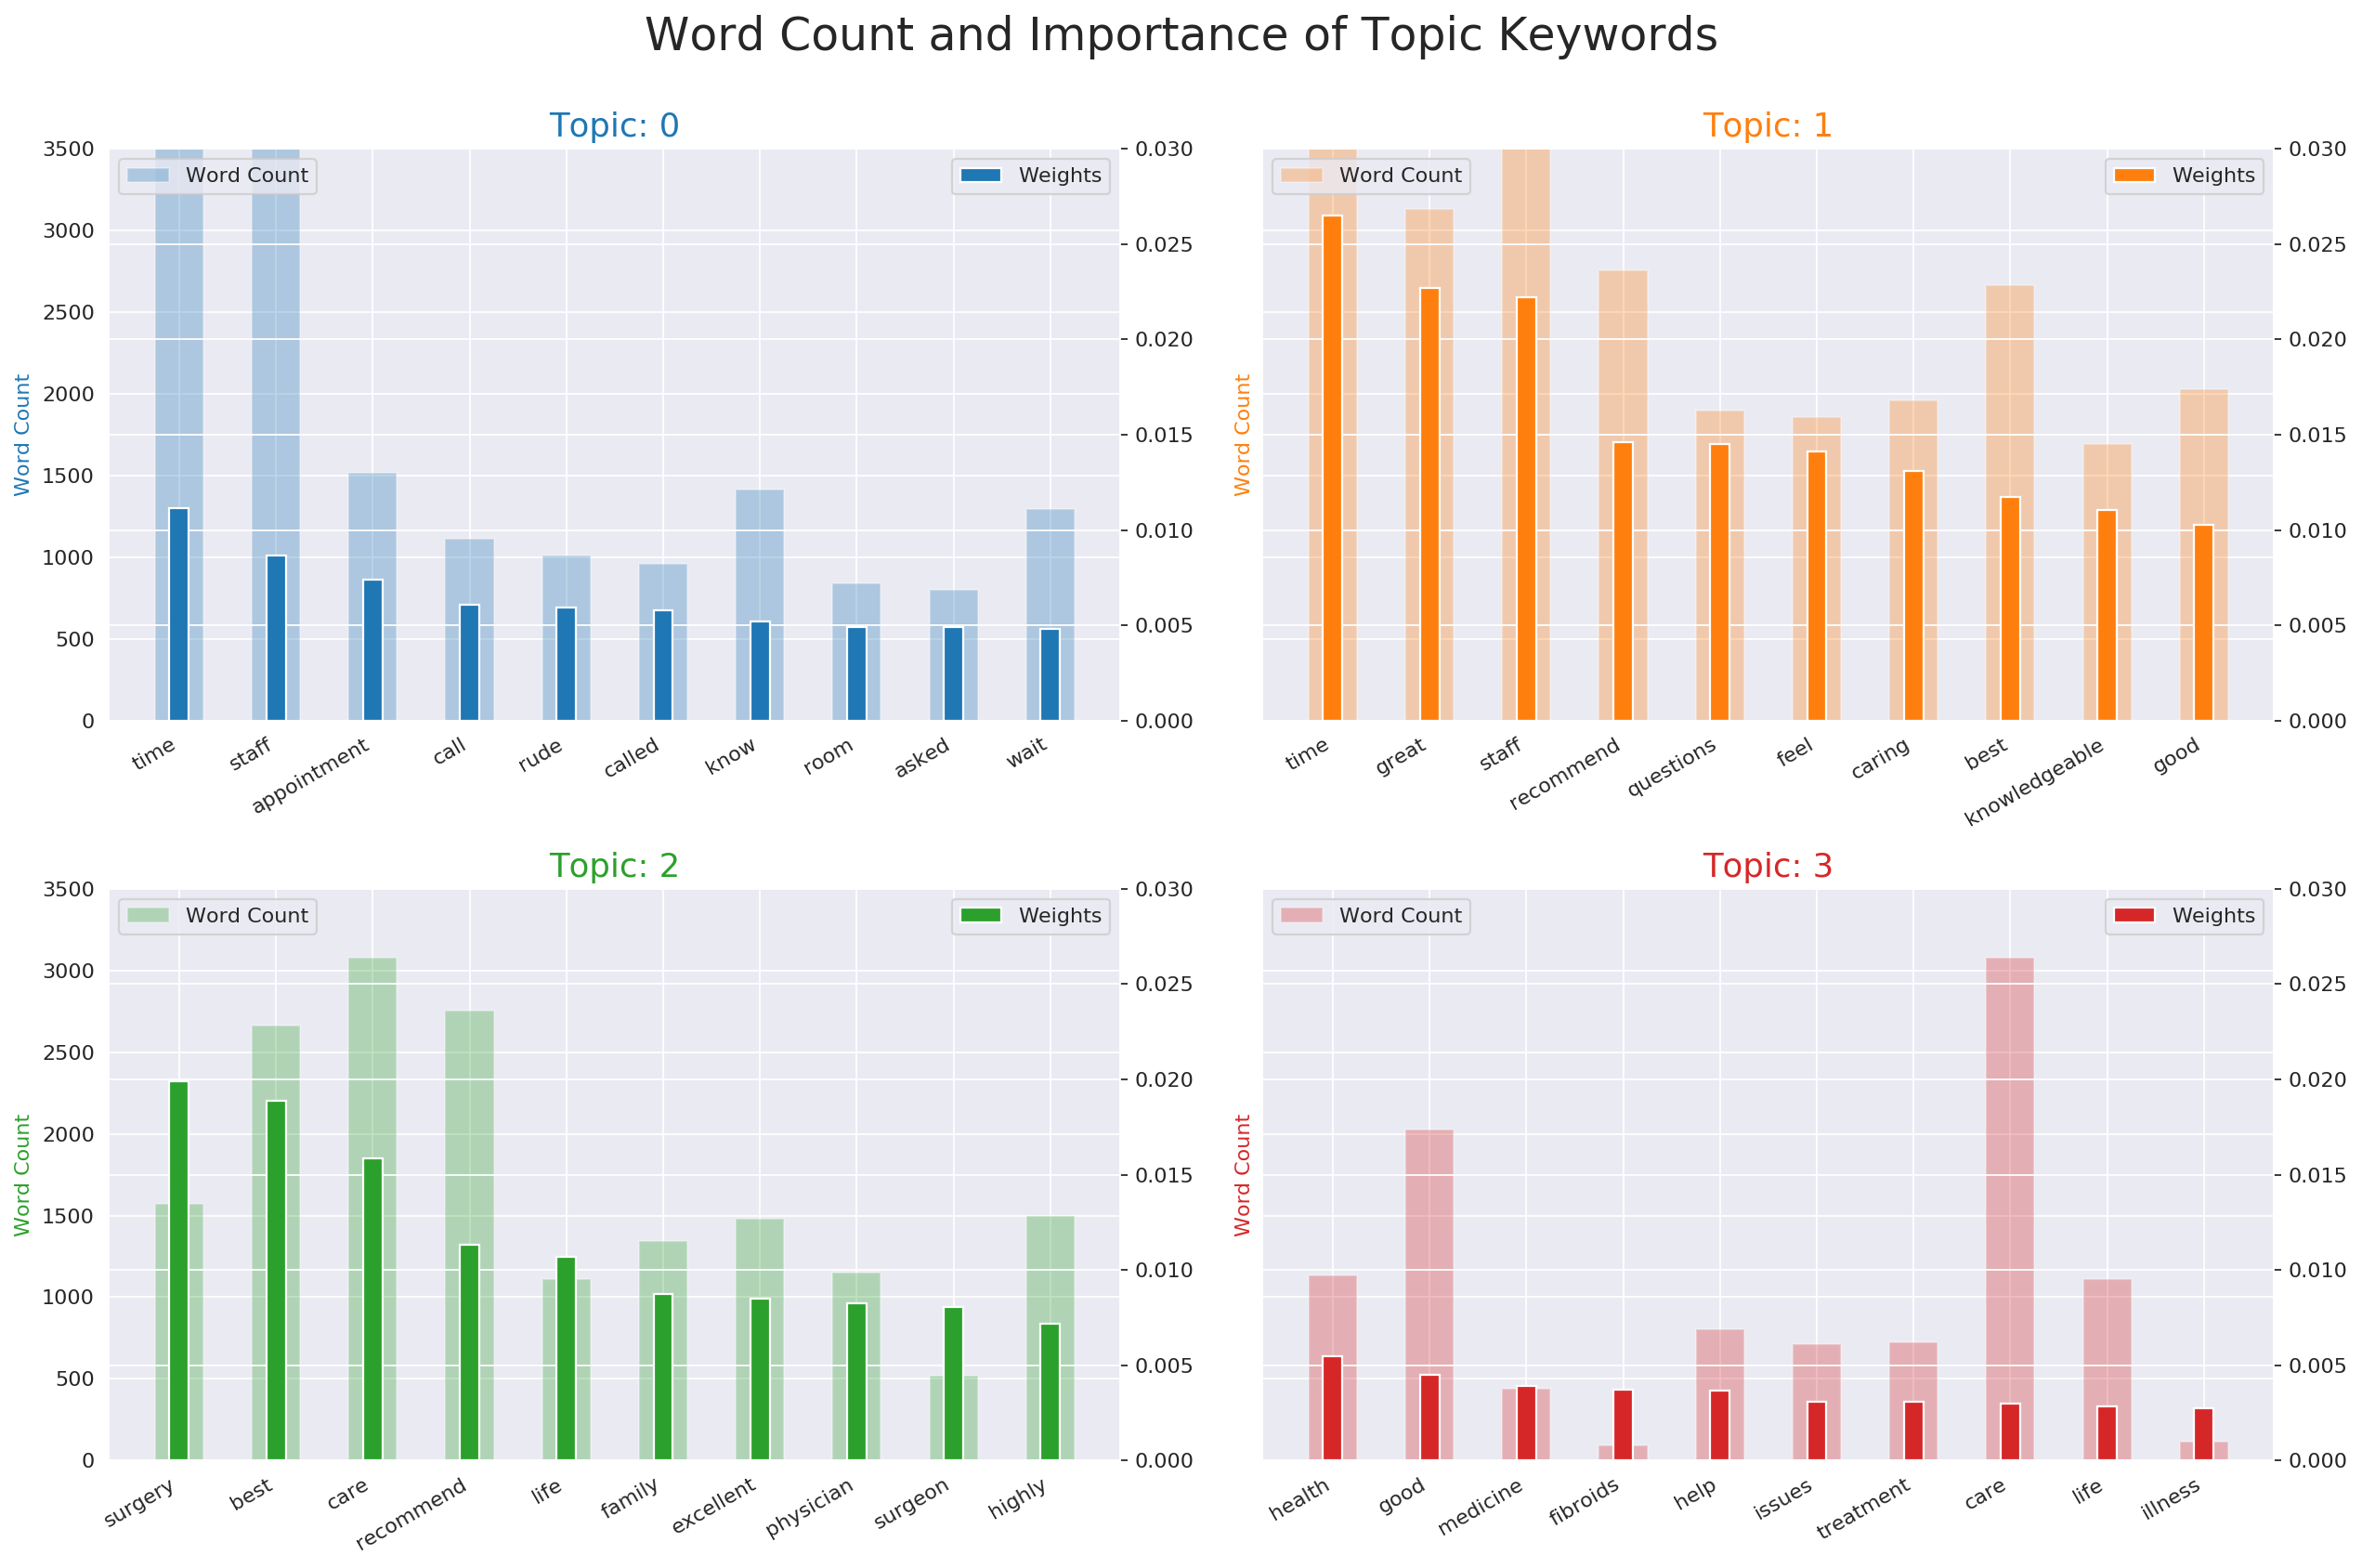

In [113]:
topics = ldamodel_all.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_all_new for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_all, doc_term_matrix_all, dictionary=ldamodel_all.id2word)
vis

## Topic Analysis for Good Reviews

In [0]:
# Topic Analysis for good reviews
rvws_g = stopText(reviews_good)
rvws_g = stopOther(reviews_good)
clean_rvws_g = [i.split() for i in rvws_g]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_g = corpora.Dictionary(clean_rvws_g)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_g = [dictionary_g.doc2bow(doc) for doc in clean_rvws_g]

In [0]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_g = Lda(doc_term_matrix_g, num_topics=4, id2word = dictionary_g, passes=50)

In [0]:
# Visualizing the top 4 topics in the good reviews
topics = ldamodel_g.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_g for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_g, doc_term_matrix_g, dictionary=ldamodel_g.id2word)
vis

## Topic Analysis for Bad Reviews

In [0]:
# Topic Analysis for good reviews
rvws_b = stopText(reviews_bad)
rvws_b = stopOther(reviews_bad)
clean_rvws_b = [i.split() for i in rvws_b]

# Creating the term dictionary of our reviews, where every unique term is assigned an index. 
dictionary_b = corpora.Dictionary(clean_rvws_b)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_b = [dictionary_b.doc2bow(doc) for doc in clean_rvws_b]

In [0]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix for good reviews
ldamodel_b = Lda(doc_term_matrix_b, num_topics=4, id2word = dictionary_b, passes=50)

#Results
print(ldamodel_b.print_topics(num_topics=4, num_words=7))

In [0]:
topics = ldamodel_b.show_topics(formatted=False)
data_flat = [w for w_list in clean_rvws_b for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
   for word, weight in topic:
       out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
   ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
   ax_twin = ax.twinx()
   ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
   ax.set_ylabel('Word Count', color=cols[i])
   ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
   ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
   ax.tick_params(axis='y', left=False)
   ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
   ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel_b, doc_term_matrix_b, dictionary=ldamodel_b.id2word)
vis

# Analysis Based on Each of the Six Specialties

There is not a well 

### General Practitioners

In [0]:
# Clean Null Values
df_gp = df_gp[df_gp.review.notnull()]
df_gp = df_gp[df_gp.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_gp = df_gp[['individual_rating', 'review']]
df_gp.individual_rating = df_gp.individual_rating.astype(float)
df_gp = df_gp[(df_gp.individual_rating >= 4) | (df_gp.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_gp['is_good'] = (df_gp.individual_rating >= 4) * 1 + (df_gp.individual_rating < 3) * 0


gp_sub = df_gp.review.str.lower()
gp_sub = removePunc(gp_sub)
gp_sub = removeNumbers(gp_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_gp = vec.fit_transform(gp_sub)
dtm_gp = pd.DataFrame(X_gp.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_gp = dtm_gp.T
print(tdm_gp.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_gp = pd.DataFrame(df_gp.is_good)
good_df_gp = dtm.iloc[np.any(mask_gp.values,axis=1),]
bad_df_gp = dtm.iloc[~np.any(mask_gp.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df) + len(good_df))/len(dtm)

In [0]:
FiDi_gp = pd.DataFrame(((good_df_gp.mean() - bad_df_gp.mean())**2)/(np.std(good_df_gp)**2 + np.std(bad_df_gp)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_gp = FiDi_gp.term.tolist()
words_gp = stopText(words_gp)
words_gp = stopOther(words_gp)

words_gp = pd.Series(words_gp).str.lstrip(" ").tolist()

FiDi_gp = FiDi_gp[FiDi_gp.term.isin(words_gp)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_gp.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_gp['total'] = tdm_gp.sum(axis =1)
freq_gp = tdm_gp.reset_index().rename(columns = {"level_0":"allwords"})

words2_gp = freq_gp.allwords.tolist()
words2_gp = stopText(words2_gp)
words2_gp = stopOther(words2_gp)

words2_gp = pd.Series(words2_gp).str.lstrip(" ").tolist()

freq_gp = freq_gp[freq_gp.allwords.isin(words2_gp)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_gp.head(25)

### Most frequent phrases

In [0]:
freq_gp['under_count'] = freq_gp.allwords.str.count('_')
freq_gp[freq_gp.under_count>=3].head(25)

### General_Practitioner - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_gp_good = df_gp[(df_gp.individual_rating >= 4)]
df_gp_bad = df_gp[(df_gp.individual_rating < 3)]

# Clean all reviews 
reviews_gp_g = df_gp_good.review.str.lower()
reviews_gp_g = removePunc(reviews_gp_g)
reviews_gp_g = removeNumbers(reviews_gp_g)
reviews_gp_g = stopText(reviews_gp_g)
reviews_gp_g = stopOther(reviews_gp_g)

gp_good = [j.lower() for j in reviews_gp_g]

sentences_gp_g = textTokenize(gp_good)
sentences_gp_g = [j for j in sentences_gp_g if len(j)>0]

#Train the model on Word2Vec
model_gp_g = gensim.models.Word2Vec(sentences_gp_g, min_count=1)

model_gp_g.wv.most_similar('time',topn=5)

### General_Practitioner - Bad

In [0]:
# Clean all reviews 
reviews_gp_b = df_gp_bad.review.str.lower()
reviews_gp_b = removePunc(reviews_gp_b)
reviews_gp_b = removeNumbers(reviews_gp_b)
reviews_gp_b = stopText(reviews_gp_b)
reviews_gp_b = stopOther(reviews_gp_b)

gp_bad = [j.lower() for j in reviews_gp_b]

sentences_gp_b = textTokenize(gp_bad)
sentences_gp_b = [j for j in sentences_gp_b if len(j)>0]

#Train the model on Word2Vec
model_gp_b = gensim.models.Word2Vec(sentences_gp_b, min_count=1)

model_gp_b.wv.most_similar('time',topn=5)

## Cardiology

In [0]:
# Clean Null Values
df_cardio = df_cardio[df_cardio.review.notnull()]
df_cardio = df_cardio[df_cardio.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_cardio = df_cardio[['individual_rating', 'review']]
df_cardio.individual_rating = df_cardio.individual_rating.astype(float)
df_cardio = df_cardio[(df_cardio.individual_rating >= 4) | (df_cardio.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_cardio['is_good'] = (df_cardio.individual_rating >= 4) * 1 + (df_cardio.individual_rating < 3) * 0


cardio_sub = df_cardio.review.str.lower()
cardio_sub = removePunc(cardio_sub)
cardio_sub = removeNumbers(cardio_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_cardio = vec.fit_transform(cardio_sub)
dtm_cardio = pd.DataFrame(X_cardio.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_cardio = dtm_cardio.T
print(tdm_cardio.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_cardio = pd.DataFrame(df_cardio.is_good)
good_df_cardio = dtm.iloc[np.any(mask_cardio.values,axis=1),]
bad_df_cardio = dtm.iloc[~np.any(mask_cardio.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_cardio) + len(good_df_cardio))/len(dtm_cardio)

In [0]:
FiDi_cardio = pd.DataFrame(((good_df_cardio.mean() - bad_df_cardio.mean())**2)/(np.std(good_df_cardio)**2 + np.std(bad_df_cardio)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_cardio = FiDi_cardio.term.tolist()
words_cardio = stopText(words_cardio)
words_cardio = stopOther(words_cardio)

words_cardio = pd.Series(words_cardio).str.lstrip(" ").tolist()

FiDi_cardio = FiDi_cardio[FiDi_cardio.term.isin(words_cardio)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_cardio.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_cardio['total'] = tdm_cardio.sum(axis =1)
freq_cardio = tdm_cardio.reset_index().rename(columns = {"level_0":"allwords"})

words2_cardio = freq_cardio.allwords.tolist()
words2_cardio = stopText(words2_cardio)
words2_cardio = stopOther(words2_cardio)

words2_cardio = pd.Series(words2_cardio).str.lstrip(" ").tolist()

freq_cardio = freq_cardio[freq_cardio.allwords.isin(words2_cardio)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_cardio.head(25)

### Most frequent phrases

In [0]:
freq_cardio['under_count'] = freq_cardio.allwords.str.count('_')
freq_cardio[freq_cardio.under_count>=3].head(25)

### Cardiology - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_cardio_good = df_cardio[(df_cardio.individual_rating >= 4)]
df_cardio_bad = df_cardio[(df_cardio.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_cardio_g = df_cardio_good.review.str.lower()
reviews_cardio_g = removePunc(reviews_cardio_g)
reviews_cardio_g = removeNumbers(reviews_cardio_g)
reviews_cardio_g = stopText(reviews_cardio_g)
reviews_cardio_g = stopOther(reviews_cardio_g)

cardio_good = [j.lower() for j in reviews_cardio_g]

sentences_cardio_g = textTokenize(cardio_good)
sentences_cardio_g = [j for j in sentences_cardio_g if len(j)>0]

#Train the model on Word2Vec
model_cardio_g = gensim.models.Word2Vec(sentences_cardio_g, min_count=1)

model_cardio_g.wv.most_similar('time',topn=5)

### Cardiology - Bad

In [0]:
# Clean all reviews 
reviews_cardio_b = df_cardio_bad.review.str.lower()
reviews_cardio_b = removePunc(reviews_cardio_b)
reviews_cardio_b = removeNumbers(reviews_cardio_b)
reviews_cardio_b = stopText(reviews_cardio_b)
reviews_cardio_b = stopOther(reviews_cardio_b)

cardio_bad = [j.lower() for j in reviews_cardio_b]

sentences_cardio_b = textTokenize(cardio_bad)
sentences_cardio_b = [j for j in sentences_cardio_b if len(j)>0]

#Train the model on Word2Vec
model_cardio_b = gensim.models.Word2Vec(sentences_cardio_b, min_count=1)

model_cardio_b.wv.most_similar('time',topn=5)

## Internal Medicine

In [0]:
# Clean Null Values
df_intern = df_intern[df_intern.review.notnull()]
df_intern = df_intern[df_intern.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_intern = df_intern[['individual_rating', 'review']]
df_intern.individual_rating = df_intern.individual_rating.astype(float)
df_intern = df_intern[(df_intern.individual_rating >= 4) | (df_intern.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_intern['is_good'] = (df_intern.individual_rating >= 4) * 1 + (df_intern.individual_rating < 3) * 0


intern_sub = df_intern.review.str.lower()
intern_sub = removePunc(intern_sub)
intern_sub = removeNumbers(intern_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_intern = vec.fit_transform(intern_sub)
dtm_intern = pd.DataFrame(X_intern.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_intern = dtm_intern.T
print(tdm_intern.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_intern = pd.DataFrame(df_intern.is_good)
good_df_intern = dtm.iloc[np.any(mask_intern.values,axis=1),]
bad_df_intern = dtm.iloc[~np.any(mask_intern.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_intern) + len(good_df_intern))/len(dtm_intern)

In [0]:
FiDi_intern = pd.DataFrame(((good_df_intern.mean() - bad_df_intern.mean())**2)/(np.std(good_df_intern)**2 + np.std(bad_df_intern)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_intern = FiDi_intern.term.tolist()
words_intern = stopText(words_intern)
words_intern = stopOther(words_intern)

words_intern = pd.Series(words_intern).str.lstrip(" ").tolist()

FiDi_intern = FiDi_intern[FiDi_intern.term.isin(words_intern)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_intern.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_intern['total'] = tdm_intern.sum(axis =1)
freq_intern = tdm_intern.reset_index().rename(columns = {"level_0":"allwords"})

words2_intern = freq_intern.allwords.tolist()
words2_intern = stopText(words2_intern)
words2_intern = stopOther(words2_intern)

words2_intern = pd.Series(words2_intern).str.lstrip(" ").tolist()

freq_intern = freq_intern[freq_intern.allwords.isin(words2_intern)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_intern.head(25)

### Most frequent phrases

In [0]:
freq_intern['under_count'] = freq_intern.allwords.str.count('_')
freq_intern[freq_intern.under_count>=3].head(25)

### Internal_Med - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_intern_good = df_intern[(df_intern.individual_rating >= 4)]
df_intern_bad = df_intern[(df_intern.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_intern_g = df_intern_good.review.str.lower()
reviews_intern_g = removePunc(reviews_intern_g)
reviews_intern_g = removeNumbers(reviews_intern_g)
reviews_intern_g = stopText(reviews_intern_g)
reviews_intern_g = stopOther(reviews_intern_g)

intern_good = [j.lower() for j in reviews_intern_g]

sentences_intern_g = textTokenize(intern_good)
sentences_intern_g = [j for j in sentences_intern_g if len(j)>0]

#Train the model on Word2Vec
model_intern_g = gensim.models.Word2Vec(sentences_intern_g, min_count=1)

model_intern_g.wv.most_similar('time',topn=5)

### Internal_Med - Bad

In [0]:
# Clean all reviews 
reviews_intern_b = df_intern_bad.review.str.lower()
reviews_intern_b = removePunc(reviews_intern_b)
reviews_intern_b = removeNumbers(reviews_intern_b)
reviews_intern_b = stopText(reviews_intern_b)
reviews_intern_b = stopOther(reviews_intern_b)

intern_bad = [j.lower() for j in reviews_intern_b]

sentences_intern_b = textTokenize(intern_bad)
sentences_intern_b = [j for j in sentences_intern_b if len(j)>0]

#Train the model on Word2Vec
model_intern_b = gensim.models.Word2Vec(sentences_intern_b, min_count=1)

model_intern_b.wv.most_similar('time',topn=5)

## Paediatrics

In [0]:
# Clean Null Values
df_ped = df_ped[df_ped.review.notnull()]
df_ped = df_ped[df_ped.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ped = df_ped[['individual_rating', 'review']]
df_ped.individual_rating = df_ped.individual_rating.astype(float)
df_ped = df_ped[(df_ped.individual_rating >= 4) | (df_ped.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ped['is_good'] = (df_ped.individual_rating >= 4) * 1 + (df_ped.individual_rating < 3) * 0


ped_sub = df_ped.review.str.lower()
ped_sub = removePunc(ped_sub)
ped_sub = removeNumbers(ped_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ped = vec.fit_transform(ped_sub)
dtm_ped = pd.DataFrame(X_ped.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ped = dtm_ped.T
print(tdm_ped.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_ped = pd.DataFrame(df_ped.is_good)
good_df_ped = dtm.iloc[np.any(mask_ped.values,axis=1),]
bad_df_ped = dtm.iloc[~np.any(mask_ped.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ped) + len(good_df_ped))/len(dtm_ped)

In [0]:
FiDi_ped = pd.DataFrame(((good_df_ped.mean() - bad_df_ped.mean())**2)/(np.std(good_df_ped)**2 + np.std(bad_df_ped)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ped = FiDi_ped.term.tolist()
words_ped = stopText(words_ped)
words_ped = stopOther(words_ped)

words_ped = pd.Series(words_ped).str.lstrip(" ").tolist()

FiDi_ped = FiDi_ped[FiDi_ped.term.isin(words_ped)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ped.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_ped['total'] = tdm_ped.sum(axis =1)
freq_ped = tdm_ped.reset_index().rename(columns = {"level_0":"allwords"})

words2_ped = freq_ped.allwords.tolist()
words2_ped = stopText(words2_ped)
words2_ped = stopOther(words2_ped)

words2_ped = pd.Series(words2_ped).str.lstrip(" ").tolist()

freq_ped = freq_ped[freq_ped.allwords.isin(words2_ped)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ped.head(25)

### Most frequent phrases

In [0]:
freq_ped['under_count'] = freq_ped.allwords.str.count('_')
freq_ped[freq_ped.under_count>=3].head(25)

### Paediatrics - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_ped_good = df_ped[(df_ped.individual_rating >= 4)]
df_ped_bad = df_ped[(df_ped.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_ped_g = df_ped_good.review.str.lower()
reviews_ped_g = removePunc(reviews_ped_g)
reviews_ped_g = removeNumbers(reviews_ped_g)
reviews_ped_g = stopText(reviews_ped_g)
reviews_ped_g = stopOther(reviews_ped_g)

ped_good = [j.lower() for j in reviews_ped_g]

sentences_ped_g = textTokenize(ped_good)
sentences_ped_g = [j for j in sentences_ped_g if len(j)>0]

#Train the model on Word2Vec
model_ped_g = gensim.models.Word2Vec(sentences_ped_g, min_count=1)

model_ped_g.wv.most_similar('time',topn=5)

### Paediatrics - Bad

In [0]:
# Clean all reviews 
reviews_ped_b = df_ped_bad.review.str.lower()
reviews_ped_b = removePunc(reviews_ped_b)
reviews_ped_b = removeNumbers(reviews_ped_b)
reviews_ped_b = stopText(reviews_ped_b)
reviews_ped_b = stopOther(reviews_ped_b)

ped_bad = [j.lower() for j in reviews_ped_b]

sentences_ped_b = textTokenize(ped_bad)
sentences_ped_b = [j for j in sentences_ped_b if len(j)>0]

#Train the model on Word2Vec
model_ped_b = gensim.models.Word2Vec(sentences_ped_b, min_count=1)

model_ped_b.wv.most_similar('time',topn=5)

## General Surgery

In [0]:
# Clean Null Values
df_surg = df_surg[df_surg.review.notnull()]
df_surg = df_surg[df_surg.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_surg = df_surg[['individual_rating', 'review']]
df_surg.individual_rating = df_surg.individual_rating.astype(float)
df_surg = df_surg[(df_surg.individual_rating >= 4) | (df_surg.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_surg['is_good'] = (df_surg.individual_rating >= 4) * 1 + (df_surg.individual_rating < 3) * 0


surg_sub = df_surg.review.str.lower()
surg_sub = removePunc(surg_sub)
surg_sub = removeNumbers(surg_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_surg = vec.fit_transform(surg_sub)
dtm_surg = pd.DataFrame(X_surg.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_surg = dtm_surg.T
print(tdm_surg.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_surg = pd.DataFrame(df_surg.is_good)
good_df_surg = dtm.iloc[np.any(mask_surg.values,axis=1),]
bad_df_surg = dtm.iloc[~np.any(mask_surg.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_surg) + len(good_df_surg))/len(dtm_surg)

In [0]:
FiDi_surg = pd.DataFrame(((good_df_surg.mean() - bad_df_surg.mean())**2)/(np.std(good_df_surg)**2 + np.std(bad_df_surg)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_surg = FiDi_surg.term.tolist()
words_surg = stopText(words_surg)
words_surg = stopOther(words_surg)

words_surg = pd.Series(words_surg).str.lstrip(" ").tolist()

FiDi_surg = FiDi_surg[FiDi_surg.term.isin(words_surg)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_surg.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_surg['total'] = tdm_surg.sum(axis =1)
freq_surg = tdm_surg.reset_index().rename(columns = {"level_0":"allwords"})

words2_surg = freq_surg.allwords.tolist()
words2_surg = stopText(words2_surg)
words2_surg = stopOther(words2_surg)

words2_surg = pd.Series(words2_surg).str.lstrip(" ").tolist()

freq_surg = freq_surg[freq_surg.allwords.isin(words2_surg)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_surg.head(25)

### Most frequent phrases

In [0]:
freq_surg['under_count'] = freq_surg.allwords.str.count('_')
freq_surg[freq_surg.under_count>=3].head(25)

### General_Surgery - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_surg_good = df_surg[(df_surg.individual_rating >= 4)]
df_surg_bad = df_surg[(df_surg.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_surg_g = df_surg_good.review.str.lower()
reviews_surg_g = removePunc(reviews_surg_g)
reviews_surg_g = removeNumbers(reviews_surg_g)
reviews_surg_g = stopText(reviews_surg_g)
reviews_surg_g = stopOther(reviews_surg_g)

surg_good = [j.lower() for j in reviews_surg_g]

sentences_surg_g = textTokenize(surg_good)
sentences_surg_g = [j for j in sentences_surg_g if len(j)>0]

#Train the model on Word2Vec
model_surg_g = gensim.models.Word2Vec(sentences_surg_g, min_count=1)

model_surg_g.wv.most_similar('time',topn=5)

### General_Surgery - Bad

In [0]:
# Clean all reviews 
reviews_surg_b = df_surg_bad.review.str.lower()
reviews_surg_b = removePunc(reviews_surg_b)
reviews_surg_b = removeNumbers(reviews_surg_b)
reviews_surg_b = stopText(reviews_surg_b)
reviews_surg_b = stopOther(reviews_surg_b)

surg_bad = [j.lower() for j in reviews_surg_b]

sentences_surg_b = textTokenize(surg_bad)
sentences_surg_b = [j for j in sentences_surg_b if len(j)>0]

#Train the model on Word2Vec
model_surg_b = gensim.models.Word2Vec(sentences_surg_b, min_count=1)

model_surg_b.wv.most_similar('time',topn=5)

## OBGYN

In [0]:
# Clean Null Values
df_ob = df_ob[df_ob.review.notnull()]
df_ob = df_ob[df_ob.review != "None"]

# Filter the reviews based on reviews having a score of 4 or more and less than 3
df_ob = df_ob[['individual_rating', 'review']]
df_ob.individual_rating = df_ob.individual_rating.astype(float)
df_ob = df_ob[(df_ob.individual_rating >= 4) | (df_ob.individual_rating < 3)]

# Make a dummy column in df_gp for if a review is good or bad
df_ob['is_good'] = (df_ob.individual_rating >= 4) * 1 + (df_ob.individual_rating < 3) * 0


ob_sub = df_ob.review.str.lower()
ob_sub = removePunc(ob_sub)
ob_sub = removeNumbers(ob_sub)
vec = CountVectorizer(ngram_range=(1, 5), min_df = 10)
X_ob = vec.fit_transform(ob_sub)
dtm_ob = pd.DataFrame(X_ob.toarray(), columns=[pd.Series(vec.get_feature_names()).str.replace(' ', '_').tolist()])
tdm_ob = dtm_ob.T
print(tdm_ob.shape)

### Calculate Fisher's Discriminant Score

In [0]:
mask_ob = pd.DataFrame(df_ob.is_good)
good_df_ob = dtm.iloc[np.any(mask_ob.values,axis=1),]
bad_df_ob = dtm.iloc[~np.any(mask_ob.values,axis=1),]

# Make sure the good and bad reviews add up to 1
(len(bad_df_ob) + len(good_df_ob))/len(dtm_ob)

In [0]:
FiDi_ob = pd.DataFrame(((good_df_ob.mean() - bad_df_ob.mean())**2)/(np.std(good_df_ob)**2 + np.std(bad_df_ob)**2)).reset_index().rename(columns = {"level_0":"term", 0:"FiDi_score"})

words_ob = FiDi_ob.term.tolist()
words_ob = stopText(words_ob)
words_ob = stopOther(words_ob)

words_ob = pd.Series(words_ob).str.lstrip(" ").tolist()

FiDi_ob = FiDi_ob[FiDi_ob.term.isin(words_ob)].sort_values(by = 'FiDi_score', ascending = False)
FiDi_ob.head(25)

### Create DF of most Frequent Words

In [0]:
tdm_ob['total'] = tdm_ob.sum(axis =1)
freq_ob = tdm_ob.reset_index().rename(columns = {"level_0":"allwords"})

words2_ob = freq_ob.allwords.tolist()
words2_ob = stopText(words2_ob)
words2_ob = stopOther(words2_ob)

words2_ob = pd.Series(words2_ob).str.lstrip(" ").tolist()

freq_ob = freq_surg[freq_ob.allwords.isin(words2_ob)].sort_values(by = 'total', ascending = False)[['allwords', 'total']]
freq_ob.head(25)

### Most frequent phrases

In [0]:
freq_ob['under_count'] = freq_ob.allwords.str.count('_')
freq_ob[freq_ob.under_count>=3].head(25)

### OBGYN - Good

In [0]:
# Make a separate df of good reviews and bad reviews
df_ob_good = df_ob[(df_ob.individual_rating >= 4)]
df_ob_bad = df_ob[(df_ob.individual_rating < 3)]

In [0]:
# Clean all reviews 
reviews_ob_g = df_ob_good.review.str.lower()
reviews_ob_g = removePunc(reviews_ob_g)
reviews_ob_g = removeNumbers(reviews_ob_g)
reviews_ob_g = stopText(reviews_ob_g)
reviews_ob_g = stopOther(reviews_ob_g)

ob_good = [j.lower() for j in reviews_ob_g]

sentences_ob_g = textTokenize(ob_good)
sentences_ob_g = [j for j in sentences_ob_g if len(j)>0]

#Train the model on Word2Vec
model_ob_g = gensim.models.Word2Vec(sentences_ob_g, min_count=1)

model_ob_g.wv.most_similar('time',topn=5)

### OBGYN - Bad

In [0]:
# Clean all reviews 
reviews_ob_b = df_ob_bad.review.str.lower()
reviews_ob_b = removePunc(reviews_ob_b)
reviews_ob_b = removeNumbers(reviews_ob_b)
reviews_ob_b = stopText(reviews_ob_b)
reviews_ob_b = stopOther(reviews_ob_b)

ob_bad = [j.lower() for j in reviews_ob_b]

sentences_ob_b = textTokenize(ob_bad)
sentences_ob_b = [j for j in sentences_ob_b if len(j)>0]

#Train the model on Word2Vec
model_ob_b = gensim.models.Word2Vec(sentences_ob_b, min_count=1)

model_ob_b.wv.most_similar('time',topn=5)